<a href="https://colab.research.google.com/github/akiabe/coursera-ml-stanford/blob/master/ml_ex1_linear_regression_with_multiple_variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Import library
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# Load dataset
data = np.loadtxt(open("ex1data2.txt", "r"), delimiter=",")

In [0]:
data[0: 5]

array([[2.104e+03, 3.000e+00, 3.999e+05],
       [1.600e+03, 3.000e+00, 3.299e+05],
       [2.400e+03, 3.000e+00, 3.690e+05],
       [1.416e+03, 2.000e+00, 2.320e+05],
       [3.000e+03, 4.000e+00, 5.399e+05]])

In [0]:
# Define X and Y
X = data[:, 0:2]  # Size of the house and number of bedroom
y = data[:, 2]  # Price of house
m = len(y)

for i in range(5):
  print("X = ", X[i, ], "y =", y[i])

X =  [2104.    3.] y = 399900.0
X =  [1600.    3.] y = 329900.0
X =  [2400.    3.] y = 369000.0
X =  [1416.    2.] y = 232000.0
X =  [3000.    4.] y = 539900.0


In [0]:
# Feature normalization
def feature_normalize(X):
  mu = np.mean(X, axis=0)
  sigma = np.std(X, axis=0, ddof=1)
  X_norm = (X-mu) / sigma

  return X_norm, mu, sigma

In [0]:
# Normalize X and add intercept term
X, mu, sigma = feature_normalize(X)
X = np.hstack((np.ones((m, 1)), X))

In [0]:
X[0:5]

array([[ 1.        ,  0.13000987, -0.22367519],
       [ 1.        , -0.50418984, -0.22367519],
       [ 1.        ,  0.50247636, -0.22367519],
       [ 1.        , -0.73572306, -1.53776691],
       [ 1.        ,  1.25747602,  1.09041654]])

In [0]:
# Initialize parameters
alpha = 0.15
num_iters = 400
theta = np.zeros(3)

In [0]:
# Compute cost for linear regression
def compute_cost_multi(x, y, theta):
    """
    Arguments:
    X -- Training data, shape (n_samples, n_features)
    y -- Labels, shape (n_samples,)
    theta -- Linear regression parameterndarray, shape (n_features,)

    Return:
    J -- The cost of using theta as the parameter for linear regression
         to fit the data points in X and y
    """
    m = len(y)
    J = np.sum(np.square(np.dot(x, theta)-y)) / (2.0*m)

    return J

In [0]:
# Gradient descent to learn theta
def gradient_descent_multi(X, y, theta, alpha, num_iters):
    """
    Arguments:
    ----------
    X -- Training data, shape (n_samples, n_features)
    y -- Labels, shape (n_samples,)
    theta --  Linear regression parameterndarray, shape (n_features,)
    alpha -- Learning rate
    num_iters -- Number of iteration

    Returns:
    theta -- Linear regression parameterndarray, shape (n_features,)
    J_history -- Cost history, shape (num_iters,)
        
    """
    m = len(y)
    J_history = np.zeros(num_iters)

    for i in range(num_iters):
        theta -= alpha / m * np.dot((np.dot(X, theta) - y).T, X)
        J_history[i] = compute_cost_multi(X, y, theta)

    return theta, J_history

In [0]:
# Run gradient descent
theta, J_history = gradient_descent_multi(X, y, theta, alpha, num_iters)

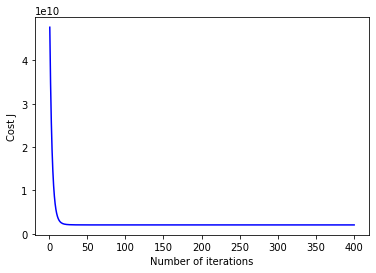

In [0]:
# Plot convergence plot
import matplotlib.pyplot as plt

plt.figure()
plt.plot(range(1, num_iters + 1), J_history, color='b')
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.show()

In [0]:
# Display the theta
print("Theta computed from gradient descent: ", theta)

Theta computed from gradient descent:  [340412.65957447 110631.0502787   -6649.47427067]


In [0]:
# Estimate the price of a 1650 size and 3 bed room house
normalize_test_data = ((np.array([1650, 3])-mu) / sigma)
normalize_test_data = np.hstack((np.ones(1), normalize_test_data))
price = np.dot(normalize_test_data, theta)
print("House price: ", price)

House price:  293081.46433492796


In [0]:
# Compute parameta theta by using normal equation
data = np.loadtxt(open("ex1data2.txt", "r"), delimiter=",")
X = data[:, 0:2]
y = data[:, 2]
m = len(y)

# Add intercept term to X
X = np.hstack((np.ones((m, 1)), X))

In [0]:
# Normal equation
def normal_equation(X, y):
  theta = np.dot(np.dot(np.linalg.pinv(np.dot(X.T, X)), X.T), y)
  return theta

In [0]:
theta = normal_equation(X, y)
print("Theta computed from the normal equations: ", theta)

Theta computed from the normal equations:  [89597.90954355   139.21067402 -8738.01911255]


In [0]:
# Estimate the price of a 1650 size and 3 bed room house
price = np.dot(np.array([1, 1650, 3]), theta)
print("House price: ", price)

House price:  293081.4643349717
